In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# https://www.capitalbikeshare.com/system-data
df = pd.read_csv('data/2011-capitalbikeshare-tripdata.csv')
df.head(10)

,Start date,Start station number
0,2011-01-01 00:01:29,31620
1,2011-01-01 00:02:46,31105
2,2011-01-01 00:06:13,31400
3,2011-01-01 00:09:21,31111
4,2011-01-01 00:28:26,31104
5,2011-01-01 00:32:33,31605
6,2011-01-01 00:35:48,31203
7,2011-01-01 00:36:42,31203
8,2011-01-01 00:45:55,31201
9,2011-01-01 00:46:06,31201


In [3]:
# set the datetime column as the index
df['Start date'] = pd.to_datetime(df['Start date'])
df.set_index('Start date', inplace=True)
df.head(10)

,Start station number
Start date,
2011-01-01 00:01:29,31620
2011-01-01 00:02:46,31105
2011-01-01 00:06:13,31400
2011-01-01 00:09:21,31111
2011-01-01 00:28:26,31104
2011-01-01 00:32:33,31605
2011-01-01 00:35:48,31203
2011-01-01 00:36:42,31203
2011-01-01 00:45:55,31201


# Resampling

In [6]:
# Resampling daily
df_daily = df.resample('D').count()
df_daily.columns = ['trips']
# TODO: Resampling weekly
df_weekly = df.resample('W').count()
df_weekly.columns = ['trips']
# TODO: Resampling monthly
df_monthly = df.resample('M').count()
df_monthly.columns = ['trips']

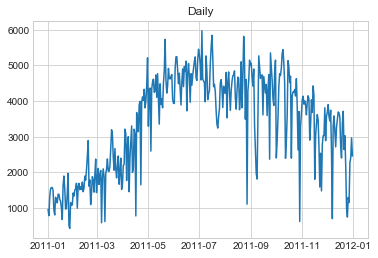

In [7]:
# plot daily chart
plt.plot(df_daily)
plt.title('Daily')
plt.show()

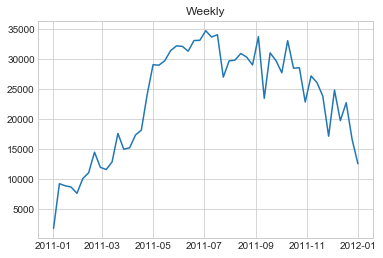

In [9]:
# TODO: plot weekly chart
plt.plot(df_weekly)
plt.title('Weekly')
plt.show()

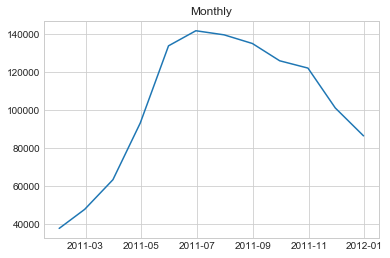

In [10]:
# TODO: plot monthly chart
plt.plot(df_monthly)
plt.title('Monthly')
plt.show()

# Autocorrelation and Partial Autocorrelation

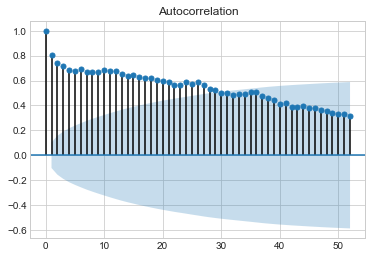

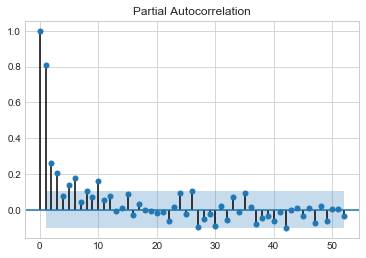

In [11]:
# Daily
lags = 52
# acf
plot_acf(df_daily, lags=lags)
plt.show()
# pacf
plot_pacf(df_daily, lags=lags)
plt.show()

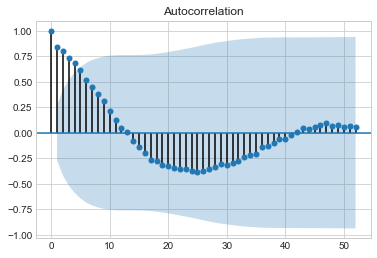

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


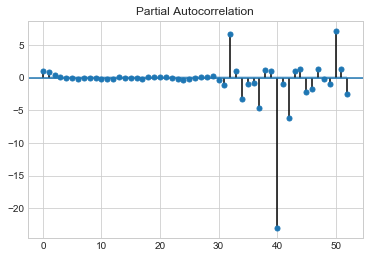

In [12]:
# Weekly
lags = 52
# acf
plot_acf(df_weekly, lags=lags)
plt.show()
# pacf
plot_pacf(df_weekly, lags=lags)
plt.show()

# Differencing 1st order

In [13]:
df_daily.diff()

,trips
Start date,
2011-01-01,nan
2011-01-02,-178.00
2011-01-03,520.00
2011-01-04,235.00
2011-01-05,35.00
2011-01-06,2.00
2011-01-07,-80.00
2011-01-08,-554.00
2011-01-09,-137.00


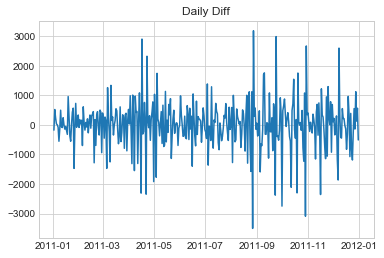

In [14]:
# plot the daily diff
plt.plot(df_daily.diff())
plt.title('Daily Diff')
plt.show()

In [21]:
# TODO: What is the day with the highest absolute difference?
df_daily.diff().abs().sort_values(by='trips', ascending=False)['trips'].head(1).index

DatetimeIndex(['2011-08-27'], dtype='datetime64[ns]', name='Start date', freq=None)

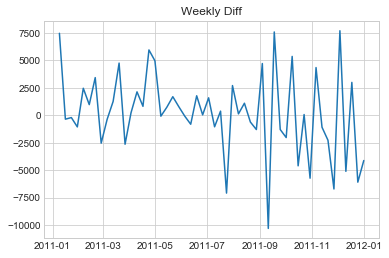

In [22]:
# plot the weekly diff
plt.plot(df_weekly.diff())
plt.title('Weekly Diff')
plt.show()

# Time Series Decomposition

[6.0, 4.0]


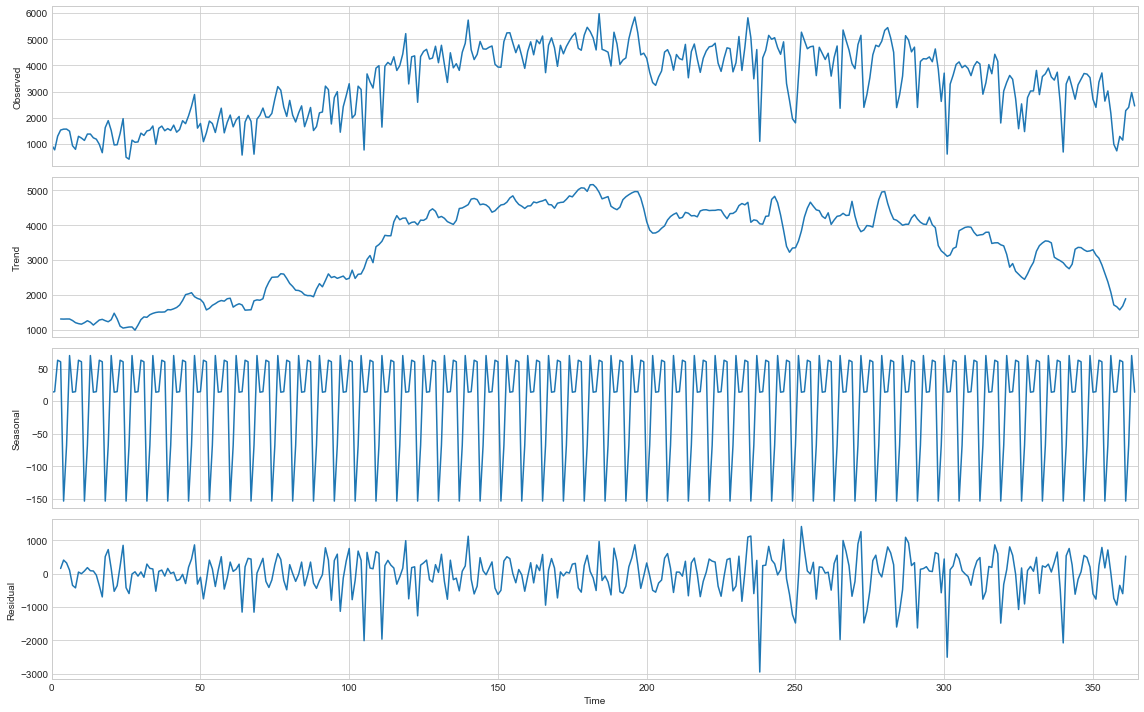

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
print(rcParams['figure.figsize'])
rcParams['figure.figsize'] = 16, 10
series = df_daily['trips'].dropna().values
result = seasonal_decompose(series, model='additive', freq=7) # frequency is how many samples should be in a cycle
result.plot()
plt.show()
rcParams['figure.figsize'] = 6, 4

In [24]:
df_daily['dow'] = df_daily.index.dayofweek
df_daily['trend'] = result.trend
df_daily['seasonal'] = result.seasonal
df_daily['resid'] = result.resid
df_daily

,trips,dow,trend,seasonal,resid
Start date,,,,,
2011-01-01,959,5,nan,13.66,nan
2011-01-02,781,6,nan,14.51,nan
2011-01-03,1301,0,nan,62.73,nan
2011-01-04,1536,1,1316.29,60.37,159.34
2011-01-05,1571,2,1313.43,-153.38,410.95
2011-01-06,1573,3,1316.43,-67.79,324.36
2011-01-07,1493,4,1316.00,69.90,107.10
2011-01-08,939,5,1272.43,13.66,-347.09
2011-01-09,802,6,1211.00,14.51,-423.51


# Smoothing

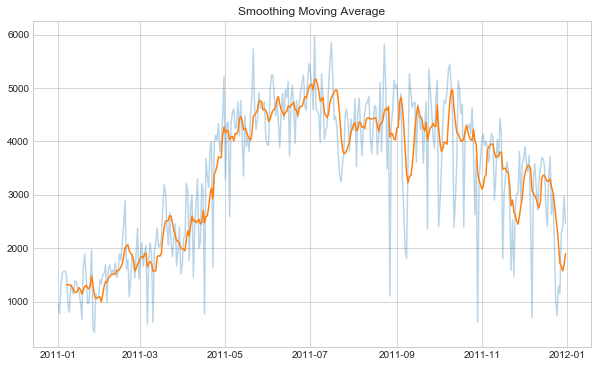

In [25]:
# rolling - moving average
plt.figure(figsize=(10,6))
plt.title('Smoothing Moving Average')
plt.plot(df_daily['trips'], alpha=0.3)
plt.plot(df_daily['trips'].rolling(window=7).mean())
plt.show()

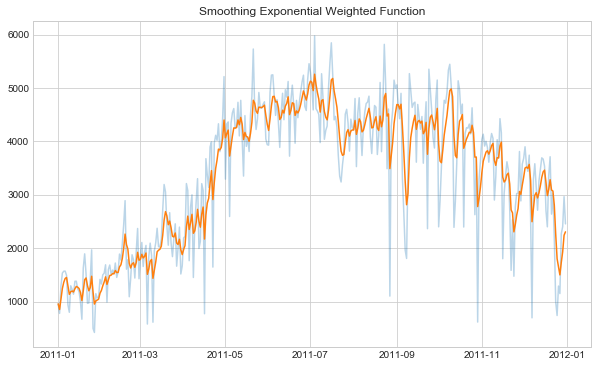

In [26]:
# exponential weighted functions
plt.figure(figsize=(10,6))
plt.title('Smoothing Exponential Weighted Function')
plt.plot(df_daily['trips'], alpha=0.3)
plt.plot(df_daily['trips'].ewm(alpha=0.3).mean())  # ewm - exponential moving window; alpha - how much weight should recent values have (0 - almost none so like moving window, 1 - almost all)
plt.show()

# Simple anomaly detection

-0.6478052759562971
586.9858539811474


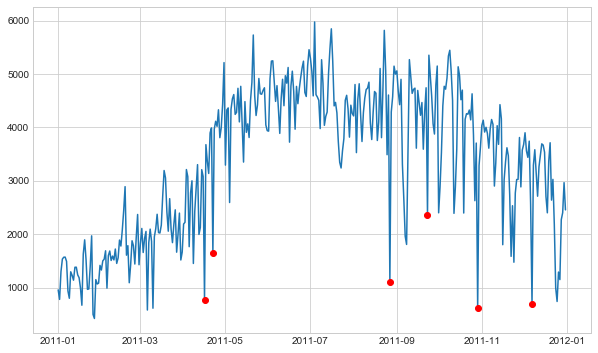

In [27]:
resid_mean = df_daily['resid'].dropna().mean()
resid_std = df_daily['resid'].dropna().std()
print(resid_mean)
print(resid_std)

n_std = 3 # basically using outlier detection criteria
df_anomaly = df_daily[(df_daily['resid'] < resid_mean - n_std * resid_std)|(df_daily['resid'] > resid_mean + n_std * resid_std)]

plt.figure(figsize=(10,6))
plt.plot(df_daily['trips'])
for k, v in df_anomaly.iterrows():
    plt.plot(k, v['trips'], 'or')
plt.show()

# Time series prediction

## Stats approach

Start date
2011-12-25     742
2011-12-26    1293
2011-12-27    1152
2011-12-28    2275
2011-12-29    2403
2011-12-30    2967
2011-12-31    2457
Freq: D, Name: trips, dtype: int64
2012-01-01   2617.20
2012-01-02   2445.04
2012-01-03   2400.36
2012-01-04   2241.12
2012-01-05   2169.44
2012-01-06   2132.64
2012-01-07   2252.13
2012-01-08   2200.02
2012-01-09   2346.21
2012-01-10   2364.92
2012-01-11   2348.84
2012-01-12   2430.25
2012-01-13   2427.42
2012-01-14   2487.47
2012-01-15   2457.73
Freq: D, dtype: float64


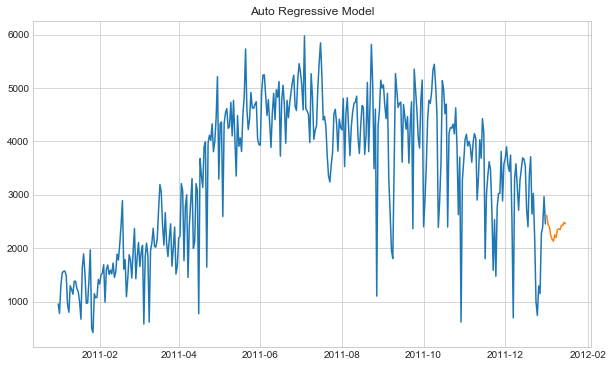

In [28]:
# Auto Regressive Model  - basically lin reg
from statsmodels.tsa.ar_model import AR
model = AR(df_daily['trips'])
# fit model
model_fit = model.fit()
print(df_daily['trips'].tail(7))
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   2759.89
2012-01-02   3357.25
2012-01-03   3357.25
2012-01-04   3357.25
2012-01-05   3357.25
2012-01-06   3357.25
2012-01-07   3357.25
2012-01-08   3357.25
2012-01-09   3357.25
2012-01-10   3357.25
2012-01-11   3357.25
2012-01-12   3357.25
2012-01-13   3357.25
2012-01-14   3357.25
2012-01-15   3357.25
Freq: D, dtype: float64


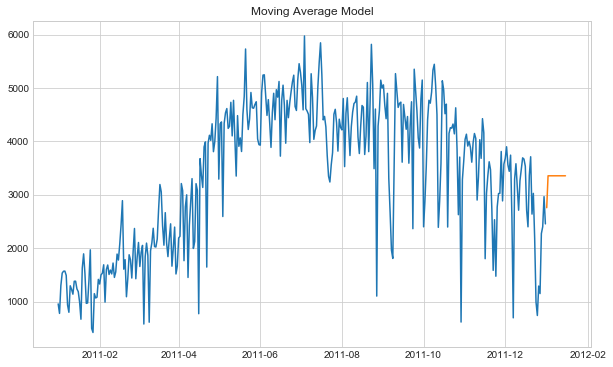

In [29]:
# Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['trips'], order=(0, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Moving Average Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   2292.70
2012-01-02   2298.05
2012-01-03   2303.34
2012-01-04   2308.58
2012-01-05   2313.77
2012-01-06   2318.90
2012-01-07   2323.98
2012-01-08   2329.01
2012-01-09   2333.99
2012-01-10   2338.92
2012-01-11   2343.80
2012-01-12   2348.62
2012-01-13   2353.40
2012-01-14   2358.13
2012-01-15   2362.82
Freq: D, dtype: float64


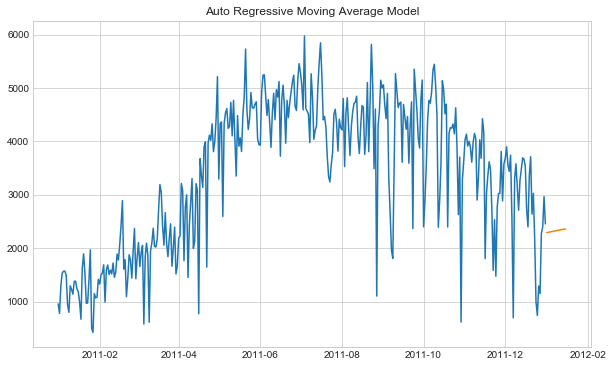

In [30]:
# Auto Regressive Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['trips'], order=(1, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Moving Average Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   1134.26
2012-01-02   1954.94
2012-01-03   2035.23
2012-01-04   2340.43
2012-01-05   2542.48
2012-01-06   2589.81
2012-01-07   1023.36
2012-01-08    960.82
2012-01-09   1781.51
2012-01-10   1861.80
2012-01-11   2167.00
2012-01-12   2369.05
2012-01-13   2416.38
2012-01-14    849.92
2012-01-15    787.39
Freq: D, dtype: float64


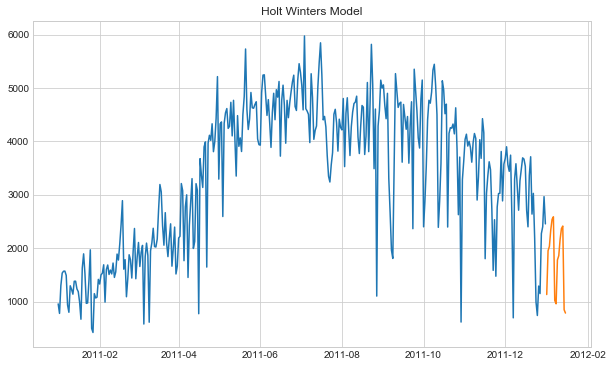

In [31]:
# Holt Winters 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(df_daily['trips'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.5)
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
plt.figure(figsize=(10,6))
plt.title('Holt Winters Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

## Machine Learning approach

In [ ]:
# Problem definition
# Load the data
# Feature Engineering
# Model Training
# Model Evaluation

## Problem definition
Predict the system usage for tomorrow

## Load the data

In [32]:
# https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [33]:
# Convert the date and set as the index
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)
df_day.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600
2011-01-06,6,1,0,1,0,4,1,1,0.20,0.23,0.52,0.09,88,1518,1606
2011-01-07,7,1,0,1,0,5,1,2,0.20,0.21,0.50,0.17,148,1362,1510
2011-01-08,8,1,0,1,0,6,0,2,0.17,0.16,0.54,0.27,68,891,959
2011-01-09,9,1,0,1,0,0,0,1,0.14,0.12,0.43,0.36,54,768,822


## Feature Engineering

In [34]:
# Shift example
df_cnt = df_day[['cnt']]
df_cnt['shift_1'] = df_cnt['cnt'].shift(1)
df_cnt.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cnt,shift_1
dteday,,
2011-01-01,985,nan
2011-01-02,801,985.00
2011-01-03,1349,801.00
2011-01-04,1562,1349.00
2011-01-05,1600,1562.00
2011-01-06,1606,1600.00
2011-01-07,1510,1606.00
2011-01-08,959,1510.00
2011-01-09,822,959.00


In [35]:
# TODO: apply shift for X days
df_cnt = df_day[['cnt']]


In [ ]:
# Handle Missing Values


In [ ]:
# feature engineering
X_columns = [x for x in df_cnt.columns if x != 'cnt']
y_column = ['cnt']

## Model Training

In [ ]:
# split the data

# do NOT shuffle the data
#df = df.sample(frac=1)

threshold = 0.9
absolute_threshold = int(len(df_cnt)*threshold)
print(len(df_cnt), absolute_threshold)

X_train = df_cnt.iloc[:absolute_threshold][X_columns]
y_train = df_cnt.iloc[:absolute_threshold][y_column]

X_test = df_cnt.iloc[absolute_threshold:][X_columns]
y_test = df_cnt.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
# TODO: Train a linear regression or other model - output will be 1 point


In [ ]:
# TODO: Calculate the MAE


In [ ]:
# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.show()

In [ ]:
# TODO: add the 'atemp' and other features to the list. What is the impact on the MAE?